# ST2 Viral Propagation - An introduction to Random Graphs
Friday, January 19th 2024

## Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rg
import igraph as ig

## The Erdos-Reny Model

In [2]:
g1 = ig.Graph()

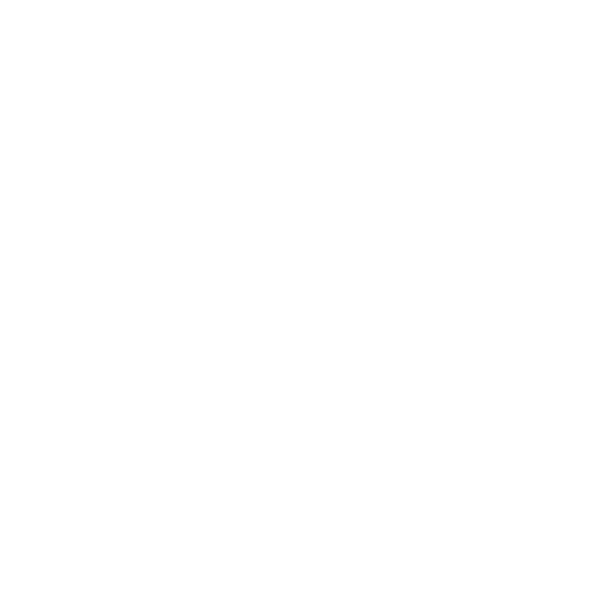

In [3]:
ig.plot(g1)

In [4]:
N = 10

In [5]:
g1.add_vertices(N)

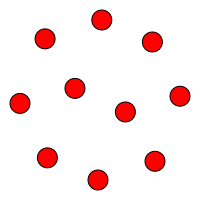

In [7]:
ig.plot(g1,bbox=(200,200))